Caio Uehara Martins <br>
nUSP 13672022 <br>
DCM - FFCLRP <br>
Professor: EVANDROE.S.RUIZ <br>

*Trabalho 2 - Algoritmos e Estruturas de Dados II*

In [137]:
#bibliotecas de sistema
import os

#bibilioteca gráfica para grafos
import networkx as nx
import matplotlib.pyplot as plt

#biblioteca de estruturação de dados
import pandas as pd

#Número aleatório
import random

c:\Users\Tigrocomputer\anaconda3\envs\aed2grafos\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


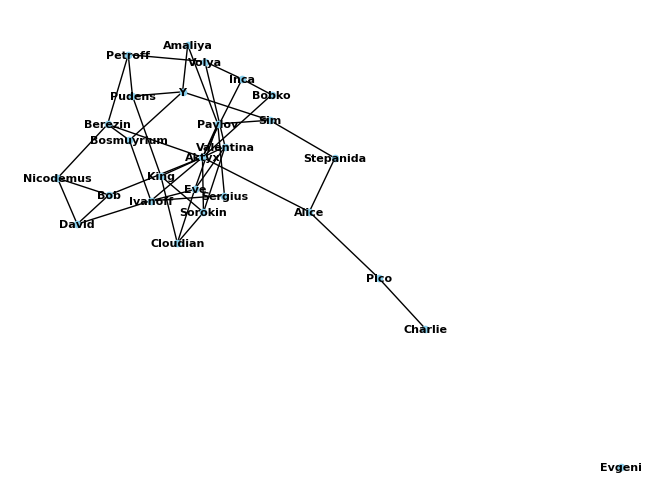

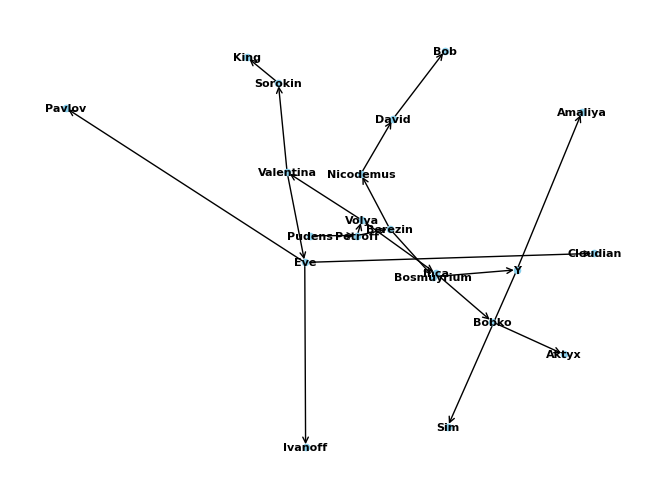

In [138]:
#explorando o networkx, criando um grafo aleatório e uma árvore de busca profunda

#criando grafo de uma rede social fictícia para uso dos algoritmos
G = nx.Graph()

# Adicionando nós (pessoas) ao grafo
lista_nomes = ["Alice", "Bob", "Charlie", "David", "Eve","Volya","Sorokin","King","Pico","Ivanoff","Stepanida","Petroff","Bobko","Sergius","Berezin","Aktyx",
               "Nicodemus","Bosmuyrium","Aktyx","Y","Amaliya","Cloudian","Sim","Pavlov","Valentina","Inca","Pudens","Evgeni"]

G.add_nodes_from(lista_nomes)

# Adicionando relações (arestas) entre as pessoas
def createRandomEdges(n):
    tamanho = len(lista_nomes)
    
    for i in range(0, n):
        numero_aleatorio = random.randrange(0, tamanho - 1)
        numero_aleatorio2 = random.randrange(0, tamanho - 1)
        
        if(numero_aleatorio != numero_aleatorio2): 
            G.add_edge(lista_nomes[numero_aleatorio], lista_nomes[numero_aleatorio2])
    
    
createRandomEdges(50)

# Desenhando o grafo
def draw(graph, *args):
    common_params = {
        "with_labels": True, 
        "font_weight": 'bold', 
        "node_size": 20, 
        "node_color": 'skyblue', 
        "font_size": 8, 
        "font_color": 'black', 
        "arrowsize": 10, 
        "arrowstyle": '->'
    }
    
    if args:
        nx.draw(graph, args[0], **common_params)
    else:
        nx.draw(graph, **common_params)
        
    #Exibe o grafo
    plt.show()
    
pos = nx.spring_layout(G)  # Posicionamento dos nós
draw(G, pos)

#Árvore DFS
DFS = nx.dfs_tree(G, "Pudens", 5)

draw(DFS)

In [139]:
#carregando os CSV com os dados da rede "Quakers"
quakers_nodelist = pd.read_csv(os.path.relpath("../data/quakers_nodelist.csv"))
quakers_edgelist = pd.read_csv(os.path.relpath("../data/quakers_edgelist.csv"))

display(quakers_nodelist)
display(quakers_edgelist)


,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


In [173]:
#criando o grafo da rede
Q = nx.Graph()

#criando os nós e as arestas
for i in quakers_nodelist.itertuples(index=False, name=None):
    name, *attr = i
    
    Q.add_node(name,        
        Historical_Significance=attr[0],
        Gender=attr[1],
        Birthdate=attr[2],
        Deathdate=attr[3],	
        num=0, #contador para o percurso
    )
    
Q.add_edges_from(list(quakers_edgelist.itertuples(index=False, name=None)))

display(nx.nodes(Q))
display(nx.edges(Q))

display(Q.nodes["Joseph Wyeth"])

NodeView(('Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 

EdgeView([('Joseph Wyeth', 'Thomas Ellwood'), ('Alexander Skene of Newtyle', 'Lilias Skene'), ('James Logan', 'Peter Collinson'), ('James Logan', 'John Bartram'), ('James Logan', 'William Penn'), ('James Logan', 'David Lloyd'), ('Dorcas Erbery', 'James Nayler'), ('William Mucklow', 'George Fox'), ('Thomas Salthouse', 'George Fox'), ('Thomas Salthouse', 'Margaret Fell'), ('William Dewsbury', 'Edward Burrough'), ('William Dewsbury', 'George Fox'), ('William Dewsbury', 'John Crook'), ('John Audland', 'John Camm'), ('John Audland', 'Francis Howgill'), ('John Audland', 'Edward Pyott'), ('John Audland', 'Charles Marshall'), ('John Audland', 'George Fox'), ('John Audland', 'Anne Camm'), ('Richard Claridge', 'Joseph Besse'), ('Richard Claridge', 'William Penn'), ('William Bradford', 'George Keith'), ('William Bradford', 'William Penn'), ('William Bradford', 'Tace Sowle'), ('Fettiplace Bellers', 'John Bellers'), ('Isabel Yeamans', 'William Penn'), ('George Fox the younger', 'Margaret Fell'), ('

{'Historical_Significance': 'religious writer',
 'Gender': 'male',
 'Birthdate': 1663,
 'Deathdate': 1731,
 'num': 0}

In [302]:
#algoritmo DFS (depthFirstSearch) baseado no ppt da aula

"""
Um comentário sobre a implementação do algoritmo.
Ela foi realizada acessando a estrutura do grafo do networkx, para 
assim poder ser explorado seus recursos. Assim, a manipulação das estruturas está
supondo trabalhar com o grafo da biblioteca e não uma lista, de forma que é necessário
criar o grafo primeiro.
"""

"""
Algoritmo em pseudocódigo

DFS(v)
    num(v) = i
    i = i + 1
    for todos_vertices u adjacentes a v
        if num(u) == 0
            anexa_aresta(uv) a edges
            DFS(u)

depthFirstSearch(G)
    for todos_vertices v em G
        num(v) == 0
    edges = NULL; \\lista de arestas
    i=1;
    while(existe(v) tq. num(v)==0)
        DFS(v)
    return(edges)
"""

def resetNum(graph):
    for node_name in graph.nodes():
        node = graph.nodes[node_name]
        node["num"] = 0;

def DFS(v_name, Q, edges):
    v = Q.nodes[v_name]
    
    v["num"] +=1

    for u_name in Q.neighbors(v_name): #percorre e encontra os adjacentes do nó dado (v)  
        u = Q.nodes[u_name]  # todo vértice u que é adjacente a v
        if u["num"] == 0:
            DFS(u_name, Q, edges)
            edges.append( (u_name, v_name) ) #anexa aresta
        
def depthFirstSearch(graph):
    resetNum(graph);
    edges = list()
    
    for v_name in graph.nodes():
        v = graph.nodes[v_name]
        if v["num"] == 0:
            DFS(v_name, graph, edges)

    for k_name in graph.nodes:
        k = graph.nodes[k_name]
        k["num"] = 0;
        
        DFS(k_name, graph, edges)
    
    return edges;

depthFirstSearch(Q)

[('William Mucklow', 'George Fox'),
 ('Anne Camm', 'Thomas Camm'),
 ('Thomas Camm', 'John Story'),
 ('Jane Sowle', 'Tace Sowle'),
 ('Tace Sowle', 'William Bradford'),
 ('William Bradford', 'William Penn'),
 ('Isabel Yeamans', 'William Penn'),
 ('Isaac Norris', 'William Penn'),
 ('John Bartram', 'Peter Collinson'),
 ('Peter Collinson', 'James Logan'),
 ('David Lloyd', 'James Logan'),
 ('Dorcas Erbery', 'James Nayler'),
 ('Richard Hubberthorne', 'Richard Farnworth'),
 ('Mary Prince', 'Mary Fisher'),
 ('Mary Fisher', 'John Perrot'),
 ('John Crook', 'John Perrot'),
 ('John Perrot', 'Richard Farnworth'),
 ('George Fox the younger', 'Margaret Fell'),
 ('Thomas Salthouse', 'Margaret Fell'),
 ('Thomas Lower', 'Margaret Fell'),
 ('William Mead', 'Margaret Fell'),
 ('Lewis Morris', 'Sir Charles Wager'),
 ('Sir Charles Wager', 'Alexander Parker'),
 ('Alexander Parker', 'Thomas Lawson'),
 ('Thomas Lawson', 'Margaret Fell'),
 ('William Gibson', 'Thomas Holme'),
 ('Thomas Holme', 'Elizabeth Leavens'

In [303]:
#versão realizada pelo LLM (ChatGPT) para adicionar o atributo cores

def add_colors(graph):
    colors = {}  # Dicionário para armazenar cores associadas a cada nó
    for node_name in graph.nodes():
        colors[node_name] = 'branco'  # Inicialmente, todos os nós são brancos
    nx.set_node_attributes(graph, colors, 'cor')
    
def reset_attributes(graph):
    for v in graph.nodes():
        graph.nodes[v]['num'] = 0
        graph.nodes[v]['cor'] = 'branco'

def DFS(v_name, Q, edges):
    v = Q.nodes[v_name]
    v['num'] += 1
    v['cor'] = 'cinza'

    for u_name in Q.neighbors(v_name):
        u = Q.nodes[u_name]
        if u['cor'] == 'branco':
            edges.append((u_name, v_name))
            DFS(u_name, Q, edges)

    v['cor'] = 'preto'

def depthFirstSearch(graph):
    reset_attributes(graph)
    edges = list()
    
    for v_name in graph.nodes():
        v = graph.nodes[v_name]
        if v['cor'] == 'branco':
            DFS(v_name, graph, edges)

    reset_attributes(graph)
    return edges

# Exemplo de uso com um grafo Q
Q = nx.Graph()
Q.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

add_colors(Q)  # Adiciona o atributo 'cor' a cada nó

result = depthFirstSearch(Q)
print(result)

[(2, 1), (3, 2), (4, 3), (5, 4)]
